# 2.Preprocess data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, json
sns.set(style="whitegrid", context="notebook")

## 2.1 Read raw data

In [3]:
file_path = '../data/raw/aug_train.csv' 

data = np.genfromtxt(
    file_path,
    delimiter=',',
    skip_header=1,    # Skip header row
    dtype=str         
)


In [4]:
with open(file_path, "r", encoding='utf-8') as file:
    columns = file.readline().split(",")
columns = [item.strip() for item in columns if item.strip()]
columns

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

## 2.2 Helper utilities

In [5]:
def print_table_from_col_arrays(col_arrays, columns, cols=None, limit=10, max_width=18):
    cols = columns if cols is None else cols
    if not col_arrays:
        print("col_arrays is empty")
        return
    n = len(next(iter(col_arrays.values())))
    k = min(limit, n)

    def _trunc(s):
        s = str(s)
        return s if len(s) <= max_width else (s[: max_width - 3] + "...")

    trunc_vec = np.vectorize(_trunc)

    values_per_col = {}
    widths = []
    for c in cols:
        vals = col_arrays[c][:k].astype(str)
        vals = trunc_vec(vals)
        w = int(max([len(c)] + [len(v) for v in vals.tolist()]))
        widths.append(w)
        values_per_col[c] = vals

    header = " | ".join([f"{c:<{w}}" for c, w in zip(cols, widths)])
    sep = "-+-".join(["-" * w for w in widths])
    print(header)
    print(sep)
    for i in range(k):
        row = " | ".join([f"{values_per_col[c][i]:<{w}}" for c, w in zip(cols, widths)])
        print(row)
    if k < n:
        print(f"... ({n - k} more rows)")

In [6]:
# Helpers: parsing + type detection (NumPy only)

col_idx = {c: i for i, c in enumerate(columns)}
col_arrays = {c: data[:, i] for c, i in col_idx.items()}


print_table_from_col_arrays(col_arrays, columns)

enrollee_id | city     | city_development_index | gender | relevent_experience | enrolled_university | education_level | major_discipline | experience | company_size | company_type   | last_new_job | training_hours | target
------------+----------+------------------------+--------+---------------------+---------------------+-----------------+------------------+------------+--------------+----------------+--------------+----------------+-------
8949        | city_103 | 0.92                   | Male   | Has relevent ex...  | no_enrollment       | Graduate        | STEM             | >20        |              |                | 1            | 36             | 1.0   
29725       | city_40  | 0.7759999999999999     | Male   | No relevent exp...  | no_enrollment       | Graduate        | STEM             | 15         | 50-99        | Pvt Ltd        | >4           | 47             | 0.0   
11561       | city_21  | 0.624                  |        | No relevent exp...  | Full time course    | G

In [7]:
def safe_float_vec(vec):
    out = np.empty(vec.shape, dtype=float)
    for i, v in enumerate(vec):
        try:
            out[i] = float(v)
        except Exception:
            out[i] = np.nan
    return out

## 2.3 Preprocessing plan 

Based on EDA in notebook 01:

1. I won't use enroll ID because it doesn't make any sense.
2. Try preprocessing numeric data first.
3. Then preprocess catetorical data.
4. Save to csv file and go to next step (train model).


### 2.3.1 Preprocess numeric data

In [8]:
columns

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [9]:
city_dev_idx_col = col_arrays["city_development_index"].copy().astype(float)
city_dev_idx_col

array([0.92 , 0.776, 0.624, ..., 0.92 , 0.802, 0.855])

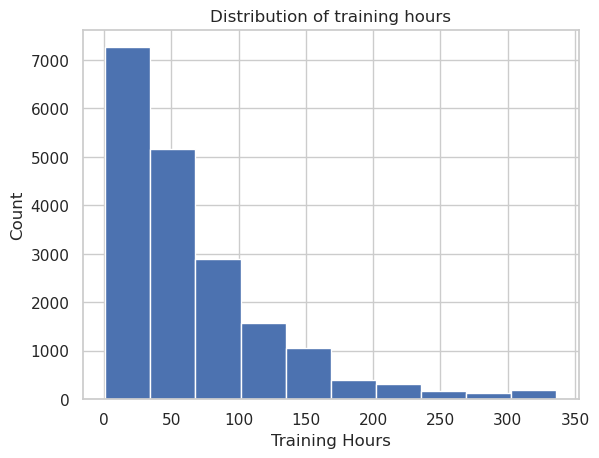

In [16]:
training_hour_col = col_arrays["training_hours"].copy().astype(float)
plt.hist(training_hour_col)
plt.title("Distribution of training hours")
plt.xlabel("Training Hours")
plt.ylabel("Count")
plt.show()

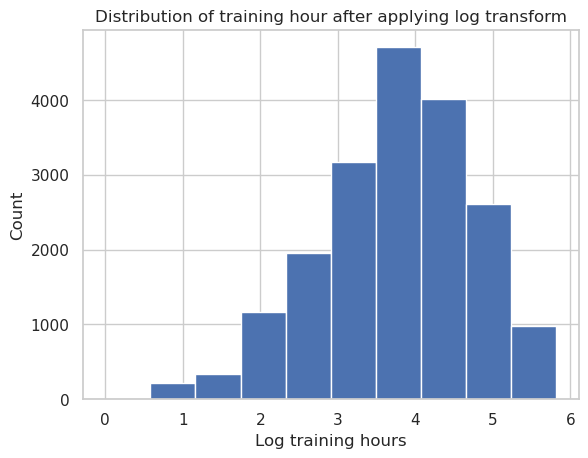

In [19]:

training_hour_log = np.log(training_hour_col + 1e-6)
training_hour_log

plt.title("Distribution of training hour after applying log transform")
plt.hist(training_hour_log)
plt.xlabel("Log training hours")
plt.ylabel("Count")
plt.show()